In [3]:
!pip install nltk

    100% |████████████████████████████████| 1.4MB 2.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk


In [1]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
alice = "carroll-alice.txt"
sents = nltk.corpus.gutenberg.sents(alice)

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Colect frequencies

In [8]:
flatten = [word for sentence in sents for word in sentence]
size = len(flatten)
len(set(flatten))
ocorrences = [nltk.FreqDist(flatten)[token] for token in nltk.FreqDist(flatten) ]

#[[x,sentence.count(x)] for x in set(sentence)]

In [9]:
ocorrences.sort(reverse=True)

#### Make the the plot

In [10]:
import seaborn as sns

frequencies = [ word/size for word in ocorrences]
sns.scatterplot(x=range(0,len(ocorrences)), y=frequencies)

#### Apply processing to tokens

In [11]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
processed_tokens = [ lancaster.stem(token) for token in flatten]
processed_ocorrences = [nltk.FreqDist(processed_tokens)[token] for token in nltk.FreqDist(processed_tokens) ]
processed_ocorrences.sort(reverse=True)
processed_ocorrences

[1993,
 1732,
 1642,
 872,
 764,
 729,
 652,
 632,
 583,
 553,
 543,
 514,
 462,
 417,
 397,
 369,
 357,
 349,
 315,
 303,
 278,
 263,
 218,
 216,
 213,
 201,
 187,
 186,
 180,
 180,
 178,
 164,
 155,
 154,
 153,
 152,
 151,
 148,
 144,
 142,
 141,
 141,
 134,
 128,
 125,
 117,
 108,
 106,
 102,
 100,
 99,
 98,
 97,
 96,
 96,
 94,
 94,
 92,
 90,
 88,
 86,
 83,
 83,
 83,
 83,
 81,
 80,
 80,
 80,
 79,
 77,
 77,
 77,
 76,
 76,
 70,
 68,
 68,
 68,
 68,
 67,
 67,
 65,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 61,
 61,
 61,
 60,
 60,
 60,
 59,
 58,
 58,
 57,
 57,
 57,
 56,
 56,
 55,
 55,
 55,
 54,
 53,
 53,
 52,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 49,
 49,
 48,
 47,
 46,
 45,
 45,
 45,
 45,
 44,
 44,
 44,
 43,
 43,
 42,
 42,
 42,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 29,
 28,
 28,
 28,
 28,
 2

#### Make the plot

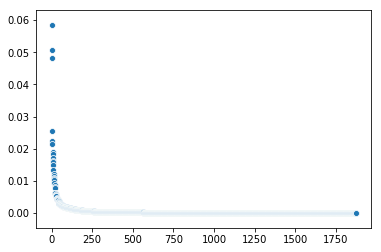

In [12]:
import seaborn as sns

processed_frequencies = [word/size for word in processed_ocorrences]
sns.scatterplot(x=range(0,len(processed_ocorrences)), y=processed_frequencies)

### Exercise 3:
Build the term-document matrix for the collection in “books”.Find the most similar document content to the “Alice in Wonderland” using tf-idf and cosine similarity.

In [21]:
books = ['shakespeare-macbeth.txt',
         'chesterton-ball.txt',
         'melville-moby_dick.txt',
         'austen-sense.txt',
         'carroll-alice.txt']

# inspired by https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

In [23]:
macbeth = nltk.corpus.gutenberg.sents(books[0])
ball = nltk.corpus.gutenberg.sents(books[1])
moby_dick = nltk.corpus.gutenberg.sents(books[2])
sense = nltk.corpus.gutenberg.sents(books[3])
alice = nltk.corpus.gutenberg.sents(books[4])

In [8]:
def computeTF (word_dict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in word_dict.items():
        tfDict[word] = count/float(bowCount)
    
    return tfDict

In [9]:
def bow (text):
    word_dictionary = {}
    for word in text:
        if not word in word_dictionary:
            word_dictionary[word] = 1
        else:
            word_dictionary[word] +=1
    
    return word_dictionary

In [2]:
def flatten (text):
    return [word for sentence in text for word in sentence]

In [53]:
def computeIDF (doclist):
    import math
    idfDict = {}
    N = len(doclist)
    idfDict = dict.fromkeys(doclist[0].keys(), 0)
    print("preliminary IDF dict:", idfDict)
    for doc in doclist:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
                print("Word in Dict: {} :".format(word), idfDict[word])
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N/float(val)) 
    
    return idfDict

In [54]:
ceasar = ["This", "is", "a", "book", "about", "ceasar", "."]
brutus = ["Brutus", "this", "book", "is", "about", "."]
corpus = [bow(ceasar), bow(brutus)]

In [55]:
corpus[0]

{'This': 1, 'is': 1, 'a': 1, 'book': 1, 'about': 1, 'ceasar': 1, '.': 1}

In [56]:
computeIDF(corpus)

preliminary IDF dict: {'This': 0, 'is': 0, 'a': 0, 'book': 0, 'about': 0, 'ceasar': 0, '.': 0}
Word in Dict: This : 1
Word in Dict: is : 1
Word in Dict: a : 1
Word in Dict: book : 1
Word in Dict: about : 1
Word in Dict: ceasar : 1
Word in Dict: . : 1


KeyError: 'Brutus'

In [31]:
alice_bow

{'alice': 398,
 'adventures': 7,
 'wonderland': 3,
 'lewis': 1,
 'carroll': 1,
 '1865': 1,
 'chapter': 12,
 'i': 543,
 'down': 3,
 'rabbit': 51,
 'hole': 5,
 'beginning': 14,
 'get': 46,
 'tired': 7,
 'sitting': 10,
 'sister': 9,
 'bank': 3,
 'nothing': 34,
 'twice': 5,
 'peeped': 3,
 'book': 11,
 'reading': 3,
 'pictures': 4,
 'conversations': 1,
 'use': 18,
 'thought': 74,
 'without': 26,
 'conversation': 10,
 'so': 27,
 'considering': 3,
 'mind': 11,
 'well': 63,
 'could': 77,
 'hot': 7,
 'day': 29,
 'made': 30,
 'feel': 8,
 'sleepy': 5,
 'stupid': 6,
 'whether': 11,
 'pleasure': 2,
 'making': 8,
 'daisy': 1,
 'chain': 1,
 'would': 83,
 'worth': 4,
 'trouble': 6,
 'getting': 22,
 'picking': 2,
 'daisies': 1,
 'suddenly': 13,
 'white': 30,
 'pink': 1,
 'eyes': 29,
 'ran': 16,
 'close': 13,
 'there': 34,
 'very': 18,
 'remarkable': 2,
 'think': 53,
 'much': 51,
 'way': 56,
 'hear': 14,
 'say': 51,
 'oh': 45,
 'dear': 29,
 'shall': 25,
 'late': 6,
 'afterwards': 2,
 'occurred': 2,
 'ou

In [27]:
alice = flatten(sents)

In [28]:
import text_transformer as tt
alice = tt.normalizer(alice)

In [29]:
alice_bow = bow(alice)

In [11]:
alice_TF = computeTF(alice_bow, alice)

In [12]:
alice_TF

{'alice': 0.028538649075003586,
 'adventures': 0.0005019360390076008,
 'wonderland': 0.00021511544528897175,
 'lewis': 7.170514842965726e-05,
 'carroll': 7.170514842965726e-05,
 '1865': 7.170514842965726e-05,
 'chapter': 0.000860461781155887,
 'i': 0.038935895597303885,
 'down': 0.00021511544528897175,
 'rabbit': 0.0036569625699125197,
 'hole': 0.00035852574214828624,
 'beginning': 0.0010038720780152016,
 'get': 0.0032984368277642335,
 'tired': 0.0005019360390076008,
 'sitting': 0.0007170514842965725,
 'sister': 0.0006453463358669152,
 'bank': 0.00021511544528897175,
 'nothing': 0.0024379750466083463,
 'twice': 0.00035852574214828624,
 'peeped': 0.00021511544528897175,
 'book': 0.0007887566327262297,
 'reading': 0.00021511544528897175,
 'pictures': 0.000286820593718629,
 'conversations': 7.170514842965726e-05,
 'use': 0.0012906926717338304,
 'thought': 0.005306180983794637,
 'without': 0.0018643338591710886,
 'conversation': 0.0007170514842965725,
 'so': 0.0019360390076007456,
 'consid

In [12]:
trial_text = "Hello"

In [13]:
punct = "\{}".format("|\\".join(string.punctuation))

In [14]:
punct

'\\!|\\"|\\#|\\$|\\%|\\&|\\\'|\\(|\\)|\\*|\\+|\\,|\\-|\\.|\\/|\\:|\\;|\\<|\\=|\\>|\\?|\\@|\\[|\\\\|\\]|\\^|\\_|\\`|\\{|\\||\\}|\\~'

In [20]:
import re 
if not re.search( r'{} +'.format(punct), trial_text):
    print("Match")
elif re.search( r'{} +'.format(punct), trial_text) == False:
    print("No Match")
else:
    print("You're an idiot")

Match


In [41]:
r'{}+'.format(punct)

'!|"|#|$|%|&|\'|(|)|*|+|,|-|.|/|:|;|<|=|>|?|@|[|\\|]|^|_|`|{|||}|~+'